In [130]:
import importlib
import matplotlib.pyplot as plt
import plot_utils as plt_utils
import numpy as np

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [131]:
league_standing_pytable = MyPyTable()
league_standing_pytable.load_from_file("lib/nhl_leaguestandings.csv")

### EDA 1 - Wins vs Losses with a line for play off cutoffs

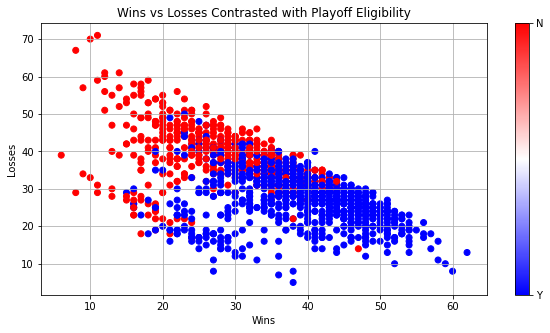

In [132]:
importlib.reload(mysklearn)

dataset_titles = league_standing_pytable.column_names
dataset = league_standing_pytable.data
x_col_name = "W"
y_col_name = "L"
groupby_col = "PLAYOFFS"

wins_col = league_standing_pytable.get_column(x_col_name)
losses_col = league_standing_pytable.get_column(y_col_name)
class_col = league_standing_pytable.get_column(groupby_col)

unique_class_vals, parallel_numbered_vals = myutils.unique_vals(class_col)

x_index = dataset_titles.index(x_col_name)
y_index = dataset_titles.index(y_col_name)

cleaned_x, cleaned_y = myutils.find_all_non_NA_matches(wins_col, losses_col)
m, b = myutils.compute_slope_intercept(cleaned_x, cleaned_y)

corre_coeff = myutils.calculate_correlation_coefficient(cleaned_x, cleaned_y)
covarience = myutils.calculate_covarience(cleaned_x, cleaned_y)

plt.figure(figsize=(10,5))
plt.title("Wins" + " vs " + "Losses Contrasted with Playoff Eligibility")
plt.ylabel("Losses")
plt.xlabel("Wins")
plt.scatter(cleaned_x, cleaned_y, c = parallel_numbered_vals, marker="o", cmap="bwr")
#plt.plot([min(cleaned_x), max(cleaned_x)], [m * min(cleaned_x) + b, m * max(cleaned_x) + b], c="g")
cbar = plt.colorbar()
cbar.set_ticks([i for i in range(len(unique_class_vals))])
cbar.set_ticklabels(unique_class_vals)
plt.grid(True)
plt.show()


### EDA 2 -Points scored by a given team in the seasons
Two charts which cover the distribution of points of a given group
1. Teams who were in the playoffs
1. Teams who weren't in the playoffs

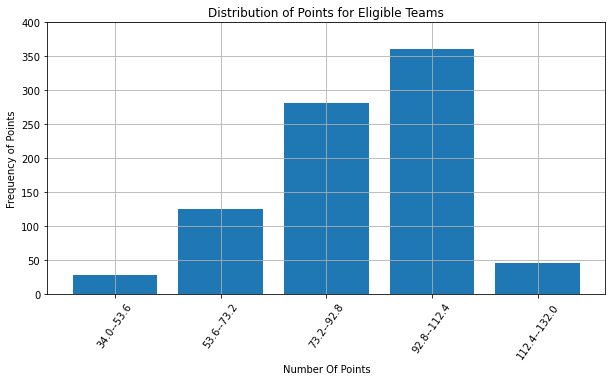

In [134]:
importlib.reload(mysklearn)

dataset_titles = league_standing_pytable.column_names
dataset = league_standing_pytable.data
x_col_name = "PTS"
groupby_col = "PLAYOFFS"

group_names, group_subtables = myutils.group_by(dataset, dataset_titles, groupby_col)
no_pytable = MyPyTable(dataset_titles, group_subtables[0])
yes_pytable = MyPyTable(dataset_titles, group_subtables[1])

yes_pts_col = yes_pytable.get_column(x_col_name)
no_pts_col = no_pytable.get_column(x_col_name)

# ------------------------------------------- 
#   for yes
# -------------------------------------------
cutoffs = myutils.compute_equal_width_cutoffs(yes_pts_col, 5)

binned_values = []
bin_labels = [i for i in range(1,6)]
bin_names = [str(cutoffs[i]) + "--" + str(cutoffs[i + 1]) for i in range(len(cutoffs) - 1)]
for i in range(len(yes_pts_col)):
    j = 0

    while yes_pts_col[i] > cutoffs[j]:
        j += 1
    binned_values.append(j)

binned_frequencies = []
for i in range(1, 6):
    binned_frequencies.append(binned_values.count(i))

plt.figure(figsize=(10,5))
x_range = np.arange(len(bin_labels))
y_range = np.arange(0, max(binned_frequencies) * 1.2, 50)
plt.bar(x_range, binned_frequencies, align="center")
plt.xticks(x_range, bin_names, rotation=55)
plt.yticks(y_range)
plt.title("Distribution of Points for Eligible Teams")
plt.ylabel("Frequency of Points")
plt.xlabel("Number Of Points")
plt.grid(True)
plt.show()


# ------------------------------------------- 
#   for no
# -------------------------------------------
cutoffs = myutils.compute_equal_width_cutoffs(yes_pts_col, 5)

binned_values = []
bin_labels = [i for i in range(1,6)]
bin_names = [str(cutoffs[i]) + "--" + str(cutoffs[i + 1]) for i in range(len(cutoffs) - 1)]
for i in range(len(yes_pts_col)):
    j = 0

    while yes_pts_col[i] > cutoffs[j]:
        j += 1
    binned_values.append(j)

binned_frequencies = []
for i in range(1, 6):
    binned_frequencies.append(binned_values.count(i))

plt.figure(figsize=(10,5))
x_range = np.arange(len(bin_labels))
y_range = np.arange(0, max(binned_frequencies) * 1.2, 50)
plt.bar(x_range, binned_frequencies, align="center")
plt.xticks(x_range, bin_names, rotation=55)
plt.yticks(y_range)
plt.title("Distribution of Points for Eligible Teams")
plt.ylabel("Frequency of Points")
plt.xlabel("Number Of Points")
plt.grid(True)
plt.show()

### EDA 3 - How many times teams made the payoffs

I think a better question would be, if they made it the previous year or within the past three years(up to us) are they more likley to make it the next year
